# News, Google Trends and Stock Market

Let's fetch teh google trends data using publicly available Google API

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('GoogleTrends_dataset')

In [3]:
df.describe()

,Debt,Color,Stocks,Restaurant,Portfolio,Inflation,Housing,Dow jones,Revenue,Economics,...,home,crash,transaction,garden,fond,train,labor,fun,environment,ring
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,54.112782,47.894737,47.176692,68.428571,70.526316,47.368421,65.842105,13.240602,33.488722,44.928571,...,79.146617,20.421053,61.718045,66.657895,44.725564,56.161654,32.567669,62.218045,37.195489,56.962406
std,7.438456,12.282685,9.408686,12.146456,9.005306,10.060176,9.575001,8.683231,14.046079,16.813701,...,8.867852,10.455809,12.161159,11.852214,17.224704,15.276329,13.121678,12.395884,18.904710,11.186519
min,27.000000,17.000000,31.000000,33.000000,48.000000,27.000000,38.000000,3.000000,13.000000,11.000000,...,52.000000,4.000000,27.000000,35.000000,13.000000,17.000000,10.000000,30.000000,0.000000,32.000000
25%,51.000000,40.000000,41.000000,61.000000,64.000000,40.000000,59.000000,9.000000,24.000000,32.000000,...,74.000000,15.000000,54.000000,58.000000,32.000000,45.250000,25.000000,53.000000,23.250000,49.250000
50%,54.000000,47.000000,46.000000,68.000000,70.000000,48.000000,66.000000,11.000000,28.000000,44.000000,...,80.000000,18.000000,60.000000,67.000000,43.000000,56.500000,31.000000,61.000000,35.500000,56.000000
75%,57.000000,55.000000,52.000000,76.000000,76.000000,53.000000,72.000000,15.000000,39.750000,56.750000,...,85.000000,24.000000,70.000000,75.000000,56.000000,66.000000,36.000000,72.000000,50.000000,64.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [4]:
df = df.set_index('date')

In [5]:
df1 = df.copy(deep = True)

In [6]:
df1.head()

,Debt,Color,Stocks,Restaurant,Portfolio,Inflation,Housing,Dow jones,Revenue,Economics,...,home,crash,transaction,garden,fond,train,labor,fun,environment,ring
date,,,,,,,,,,,,,,,,,,,,,
2011-01-02,62,53,64,82,74,41,82,7,39,29,...,93,14,45,64,47,57,45,43,79,59
2011-01-09,63,47,62,58,86,51,82,8,41,34,...,92,14,53,85,47,86,61,77,39,56
2011-01-16,59,36,61,64,89,64,86,8,53,28,...,88,16,41,68,55,51,42,51,26,40
2011-01-23,68,42,63,82,80,64,75,11,65,56,...,93,30,47,78,73,28,47,61,63,58
2011-01-30,61,49,62,58,74,56,79,9,69,53,...,99,15,51,59,61,75,57,53,60,62


In [7]:
df2 = pd.read_csv('DJI.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,11577.429688,11742.679688,11577.349609,11674.759766,11674.759766,933840000
1,2011-01-10,11672.339844,11794.150391,11573.870117,11787.379883,11787.379883,815170000
2,2011-01-17,11783.820313,11905.480469,11744.769531,11871.839844,11871.839844,799920000
3,2011-01-24,11873.429688,12020.519531,11803.040039,11823.700195,11823.700195,926210000
4,2011-01-31,11824.389648,12092.419922,11817.879883,12092.150391,12092.150391,796400000


In [8]:
df2['direction'] = np.log(df2['Adj Close']/df2['Adj Close'].shift(1))

In [9]:
df2['direction'] = np.where(df2['direction'] < 0, -1, 1)

In [10]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume,direction
0,2011-01-03,11577.429688,11742.679688,11577.349609,11674.759766,11674.759766,933840000,1
1,2011-01-10,11672.339844,11794.150391,11573.870117,11787.379883,11787.379883,815170000,1
2,2011-01-17,11783.820313,11905.480469,11744.769531,11871.839844,11871.839844,799920000,1
3,2011-01-24,11873.429688,12020.519531,11803.040039,11823.700195,11823.700195,926210000,-1
4,2011-01-31,11824.389648,12092.419922,11817.879883,12092.150391,12092.150391,796400000,1
...,...,...,...,...,...,...,...,...
261,2016-01-04,17405.480469,17405.480469,16314.570313,16346.450195,16346.450195,692150000,-1
262,2016-01-11,16358.709961,16593.509766,15842.110352,15988.080078,15988.080078,796840000,-1
263,2016-01-18,16009.450195,16171.959961,15450.559570,16093.509766,16093.509766,627220000,1
264,2016-01-25,16086.459961,16466.300781,15863.719727,16466.300781,16466.300781,727870000,1


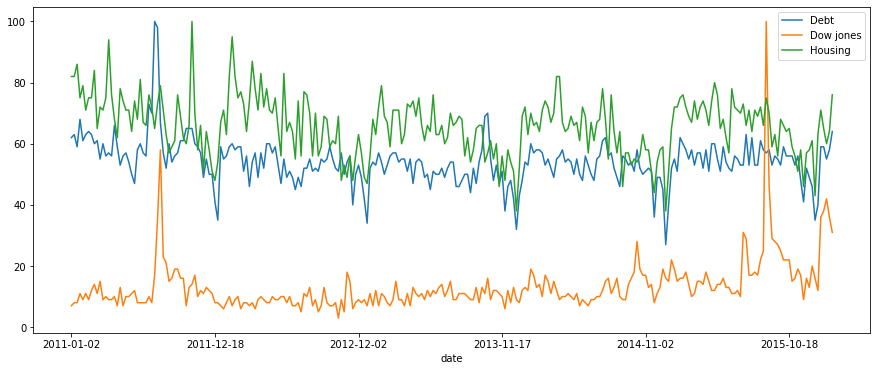

In [11]:
fig = plt.gcf()
fig.set_size_inches(15, 6)

ax = plt.gca()

df.plot(kind='line',y='Debt',ax=ax)

df.plot(kind='line',y='Dow jones',ax=ax)

df.plot(kind='line',y='Housing',ax=ax)
plt.show()

In [12]:
df1.head()

,Debt,Color,Stocks,Restaurant,Portfolio,Inflation,Housing,Dow jones,Revenue,Economics,...,home,crash,transaction,garden,fond,train,labor,fun,environment,ring
date,,,,,,,,,,,,,,,,,,,,,
2011-01-02,62,53,64,82,74,41,82,7,39,29,...,93,14,45,64,47,57,45,43,79,59
2011-01-09,63,47,62,58,86,51,82,8,41,34,...,92,14,53,85,47,86,61,77,39,56
2011-01-16,59,36,61,64,89,64,86,8,53,28,...,88,16,41,68,55,51,42,51,26,40
2011-01-23,68,42,63,82,80,64,75,11,65,56,...,93,30,47,78,73,28,47,61,63,58
2011-01-30,61,49,62,58,74,56,79,9,69,53,...,99,15,51,59,61,75,57,53,60,62


In [13]:
# from sklearn import preprocessing
# df1= preprocessing.scale(df1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

np.random.seed(1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_X = scaler.fit_transform(df1)


In [15]:
train_data_X

array([[0.47945205, 0.43373494, 0.47826087, ..., 0.18571429, 0.79      ,
        0.39705882],
       [0.49315068, 0.36144578, 0.44927536, ..., 0.67142857, 0.39      ,
        0.35294118],
       [0.43835616, 0.22891566, 0.43478261, ..., 0.3       , 0.26      ,
        0.11764706],
       ...,
       [0.38356164, 0.42168675, 0.42028986, ..., 0.38571429, 0.2       ,
        0.32352941],
       [0.42465753, 0.45783133, 0.33333333, ..., 0.7       , 0.33      ,
        0.73529412],
       [0.50684932, 0.3373494 , 0.36231884, ..., 0.67142857, 0.71      ,
        0.60294118]])

In [16]:
train_data_X.shape

(266, 98)

In [17]:
train_data_Y = df2['direction'].to_numpy()

In [18]:
train_data_Y

array([ 1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1, -1,  1, -1

In [19]:
train_data_Y.shape

(266,)

In [20]:
train_X = train_data_X[:230]
test_X = train_data_X[230:]

In [21]:
train_Y = train_data_Y[:230]
test_Y = train_data_Y[230:]

In [22]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((230, 98), (36, 98), (230,), (36,))

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, min_delta=0.0001)
mc = ModelCheckpoint('basic_best_model_ML_akshay_project.h5',
                     monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import metrics

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=(train_X.shape[1])))

model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=75, batch_size=1, verbose=1,validation_split = 0.1,callbacks=[mc])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               12672     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/75
206/207 [============================>.] - ETA: 0s - loss: 0.5698 - accuracy: 0.0583
Epoch 00001: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 2ms/step - loss: 0.5636 - accuracy: 0.0580 - val_loss: 0.1996 - val_accuracy: 0.0000e+00
Epoch 2/75
190/207 [==========================>...] - ETA: 0s - loss: 0.4860 - accuracy: 0.0000e+00
Epoch 00002: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 2ms/step - loss: 0.4699 -

167/207 [=======================>......] - ETA: 0s - loss: -2.2823 - accuracy: 0.0898  
Epoch 00027: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 1ms/step - loss: -1.9875 - accuracy: 0.1111 - val_loss: 0.7670 - val_accuracy: 0.1304
Epoch 28/75
160/207 [======================>.......] - ETA: 0s - loss: -2.7886 - accuracy: 0.2000
Epoch 00028: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 1ms/step - loss: -2.3925 - accuracy: 0.1594 - val_loss: 0.2269 - val_accuracy: 0.0435
Epoch 29/75
177/207 [========================>.....] - ETA: 0s - loss: -2.6035 - accuracy: 0.1864
Epoch 00029: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 1ms/step - loss: -2.3301 - accuracy: 0.1594 - val_loss: -0.2348 - val_accuracy: 0.0000e+00
Epoch 30/75
172/207 [=======================>......] - ETA: 0s - loss: -3.4423 - accuracy: 0.1453  
Epoch 00030: val_accuracy did not improve from 0.4

Epoch 56/75
179/207 [========================>.....] - ETA: 0s - loss: -14.6756 - accuracy: 0.0838
Epoch 00056: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 1ms/step - loss: -13.7922 - accuracy: 0.1256 - val_loss: 3.8790 - val_accuracy: 0.2609
Epoch 57/75
179/207 [========================>.....] - ETA: 0s - loss: -14.3582 - accuracy: 0.2011
Epoch 00057: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 1ms/step - loss: -13.8333 - accuracy: 0.1836 - val_loss: -0.6243 - val_accuracy: 0.0435
Epoch 58/75
163/207 [======================>.......] - ETA: 0s - loss: -11.9449 - accuracy: 0.1411 
Epoch 00058: val_accuracy did not improve from 0.43478
207/207 [==============================] - 0s 1ms/step - loss: -14.1937 - accuracy: 0.1594 - val_loss: -0.9976 - val_accuracy: 0.0435
Epoch 59/75
164/207 [======================>.......] - ETA: 0s - loss: -11.9554 - accuracy: 0.1524
Epoch 00059: val_accuracy did not imp

In [46]:
from tensorflow.keras.models import load_model

basic_best_model = load_model('basic_best_model_ML_akshay_project.h5')

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Pred_y = basic_best_model.predict(test_X).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_Y, Pred_y)

auc_keras = auc(fpr_keras, tpr_keras)

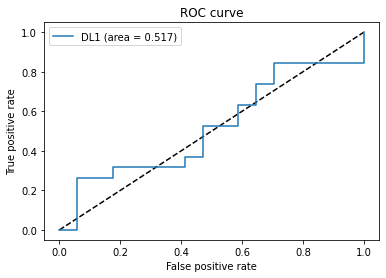

In [109]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='DL1 (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

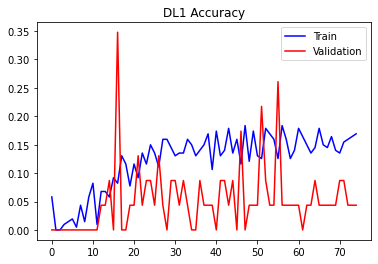

In [110]:
plt.figure()
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], 'b', label='Train')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('DL1 Accuracy')
plt.show()

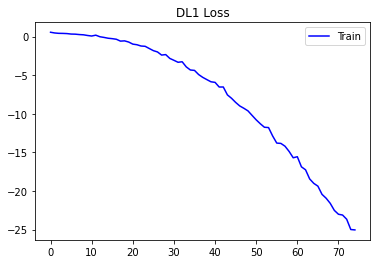

In [111]:
plt.figure()
plt.plot(range(len(history.history['loss'])), history.history['loss'], 'b', label='Train')
#plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('DL1 Loss')
plt.show()

LSTM

In [51]:
train_X_lstm = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X_lstm = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

In [52]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, min_delta=0.0001)
mc = ModelCheckpoint('LSTM_best_model_ML_akshay_project.h5',
                     monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [54]:
from keras.layers import LSTM
from keras.layers.core import Dropout

model = Sequential()
model.add(LSTM(128, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2]), return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history1 = model.fit(train_X_lstm, train_Y, epochs=100, batch_size=1, validation_split = 0.1,verbose=1, callbacks = [mc])

Epoch 1/100
207/207 [==============================] - ETA: 0s - loss: 0.5376 - accuracy: 0.0048
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to LSTM_best_model_ML_akshay_project.h5
207/207 [==============================] - 1s 5ms/step - loss: 0.5376 - accuracy: 0.0048 - val_loss: 0.1382 - val_accuracy: 0.0000e+00
Epoch 2/100
201/207 [============================>.] - ETA: 0s - loss: 0.4716 - accuracy: 0.0000e+00
Epoch 00002: val_accuracy did not improve from 0.00000
207/207 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.0000e+00 - val_loss: 0.1182 - val_accuracy: 0.0000e+00
Epoch 3/100
205/207 [============================>.] - ETA: 0s - loss: 0.4988 - accuracy: 0.0000e+00
Epoch 00003: val_accuracy did not improve from 0.00000
207/207 [==============================] - 1s 5ms/step - loss: 0.4949 - accuracy: 0.0000e+00 - val_loss: 0.0797 - val_accuracy: 0.0000e+00
Epoch 4/100
183/207 [=========================>....] - ETA: 0s - los

Epoch 29/100
201/207 [============================>.] - ETA: 0s - loss: -2.7744 - accuracy: 0.1692
Epoch 00029: val_accuracy did not improve from 0.39130
207/207 [==============================] - 1s 3ms/step - loss: -2.6026 - accuracy: 0.1643 - val_loss: 0.6731 - val_accuracy: 0.0870
Epoch 30/100
191/207 [==========================>...] - ETA: 0s - loss: -2.6683 - accuracy: 0.1466
Epoch 00030: val_accuracy did not improve from 0.39130
207/207 [==============================] - 1s 3ms/step - loss: -2.6591 - accuracy: 0.1643 - val_loss: 0.8306 - val_accuracy: 0.0870
Epoch 31/100
199/207 [===========================>..] - ETA: 0s - loss: -3.0366 - accuracy: 0.1960
Epoch 00031: val_accuracy did not improve from 0.39130
207/207 [==============================] - 1s 3ms/step - loss: -2.9606 - accuracy: 0.1932 - val_loss: 0.2535 - val_accuracy: 0.0435
Epoch 32/100
187/207 [==========================>...] - ETA: 0s - loss: -3.4923 - accuracy: 0.1872
Epoch 00032: val_accuracy did not improve f

Epoch 58/100
191/207 [==========================>...] - ETA: 0s - loss: -12.6031 - accuracy: 0.2147
Epoch 00058: val_accuracy did not improve from 0.39130
207/207 [==============================] - 0s 2ms/step - loss: -11.7465 - accuracy: 0.2126 - val_loss: 4.4006 - val_accuracy: 0.0870
Epoch 59/100
194/207 [===========================>..] - ETA: 0s - loss: -11.3874 - accuracy: 0.2474
Epoch 00059: val_accuracy did not improve from 0.39130
207/207 [==============================] - 1s 3ms/step - loss: -11.9909 - accuracy: 0.2319 - val_loss: 1.4483 - val_accuracy: 0.0435
Epoch 60/100
191/207 [==========================>...] - ETA: 0s - loss: -11.2819 - accuracy: 0.2042
Epoch 00060: val_accuracy did not improve from 0.39130
207/207 [==============================] - 1s 3ms/step - loss: -12.3544 - accuracy: 0.2077 - val_loss: 4.5179 - val_accuracy: 0.0870
Epoch 61/100
202/207 [============================>.] - ETA: 0s - loss: -11.8874 - accuracy: 0.2030
Epoch 00061: val_accuracy did not im

194/207 [===========================>..] - ETA: 0s - loss: -25.9670 - accuracy: 0.2423
Epoch 00086: val_accuracy did not improve from 0.39130
207/207 [==============================] - 1s 3ms/step - loss: -26.7311 - accuracy: 0.2367 - val_loss: 2.5050 - val_accuracy: 0.0435
Epoch 87/100
194/207 [===========================>..] - ETA: 0s - loss: -26.2594 - accuracy: 0.2010
Epoch 00087: val_accuracy did not improve from 0.39130
207/207 [==============================] - 0s 2ms/step - loss: -26.0500 - accuracy: 0.2077 - val_loss: 8.4455 - val_accuracy: 0.0870
Epoch 88/100
184/207 [=========================>....] - ETA: 0s - loss: -28.7867 - accuracy: 0.2500
Epoch 00088: val_accuracy did not improve from 0.39130
207/207 [==============================] - 0s 2ms/step - loss: -27.5978 - accuracy: 0.2560 - val_loss: 2.4597 - val_accuracy: 0.0435
Epoch 89/100
185/207 [=========================>....] - ETA: 0s - loss: -26.9910 - accuracy: 0.2162
Epoch 00089: val_accuracy did not improve from 0.

In [55]:
from tensorflow.keras.models import load_model

LSTM_best_model = load_model('LSTM_best_model_ML_akshay_project.h5')

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Pred_y = LSTM_best_model.predict(test_X_lstm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_Y, Pred_y)

auc_keras = auc(fpr_keras, tpr_keras)

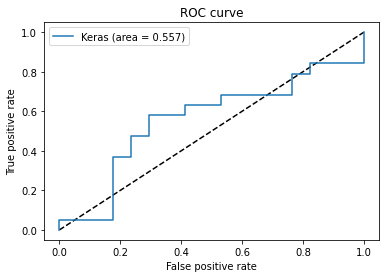

In [67]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

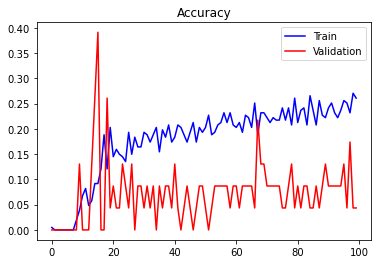

In [57]:
plt.figure()
plt.plot(range(len(history1.history['accuracy'])), history1.history['accuracy'], 'b', label='Train')
plt.plot(range(len(history1.history['val_accuracy'])), history1.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('Accuracy')
plt.show()

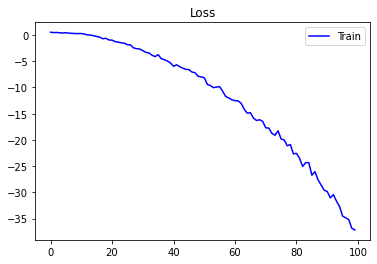

In [58]:
plt.figure()
plt.plot(range(len(history1.history['loss'])), history1.history['loss'], 'b', label='Train')
plt.legend()

plt.title('Loss')
plt.show()

In [70]:
model2_acc = history1.history['accuracy'][-1] * 100
print(model2_acc)

31.73913061618805


In [74]:
train_X_conv = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X_conv = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

In [77]:
from keras.layers import Conv1D
model =Sequential()
model.add(Conv1D(256, 1,activation='relu', input_shape=(train_X_conv.shape[1], train_X_conv.shape[2])))
model.add(Conv1D(512, 1, activation='relu')) 

model.summary()
model.add(Dense(1,activation='sigmoid'))
          
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
history2 = model.fit(train_X_conv, train_Y, epochs=150, batch_size=1, verbose=1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 256)            25344     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 512)            131584    
Total params: 156,928
Trainable params: 156,928
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
230/230 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.1000 - mse: 1.0051
Epoch 2/150
230/230 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.0000e+00 - mse: 0.9911
Epoch 3/150
230/230 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.0000e+00 - mse: 0.9737
Epoch 4/150
230/230 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.0174 - mse: 0.9568
Epoch 5/150
230/230 [====================

230/230 [==============================] - 0s 2ms/step - loss: -5.5661 - accuracy: 0.4957 - mse: 0.5197
Epoch 65/150
230/230 [==============================] - 0s 2ms/step - loss: -5.1552 - accuracy: 0.4652 - mse: 0.5556
Epoch 66/150
230/230 [==============================] - 0s 2ms/step - loss: -5.4417 - accuracy: 0.5043 - mse: 0.5001
Epoch 67/150
230/230 [==============================] - 0s 2ms/step - loss: -5.5932 - accuracy: 0.4870 - mse: 0.5044
Epoch 68/150
230/230 [==============================] - 0s 2ms/step - loss: -5.4759 - accuracy: 0.4783 - mse: 0.5364
Epoch 69/150
230/230 [==============================] - 0s 2ms/step - loss: -5.4646 - accuracy: 0.4870 - mse: 0.5115
Epoch 70/150
230/230 [==============================] - 0s 2ms/step - loss: -5.7561 - accuracy: 0.5217 - mse: 0.5039
Epoch 71/150
230/230 [==============================] - 0s 2ms/step - loss: -6.0648 - accuracy: 0.5348 - mse: 0.4697
Epoch 72/150
230/230 [==============================] - 0s 2ms/step - loss: -

230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 133/150
230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 134/150
230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 135/150
230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 136/150
230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 137/150
230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 138/150
230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 139/150
230/230 [==============================] - 0s 2ms/step - loss: -6.5053 - accuracy: 0.5696 - mse: 0.4304
Epoch 140/150
230/230 [==============================] - 0s 2ms/step -

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Pred_y = model.predict(test_X_conv).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_Y, Pred_y)

auc_keras = auc(fpr_keras, tpr_keras)

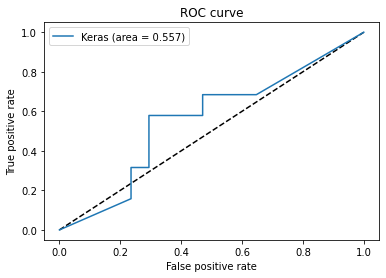

In [79]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

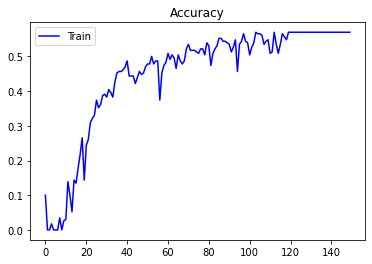

In [80]:
plt.figure()
plt.plot(range(len(history2.history['accuracy'])), history2.history['accuracy'], 'b', label='Train')
#plt.plot(range(len(history2.history['val_accuracy'])), history2.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('Accuracy')
plt.show()

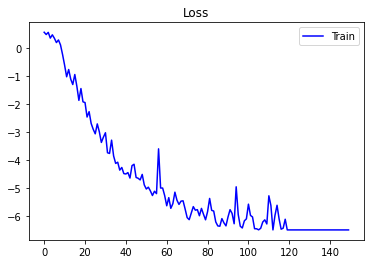

In [93]:
plt.figure()
plt.plot(range(len(history2.history['loss'])), history2.history['loss'], 'b', label='Train')
plt.legend()

plt.title('Loss')
plt.show()

In [59]:
train_X_conv = train_X.reshape(train_X.shape[0], 1, train_X.shape[1])
test_X_conv = test_X.reshape(test_X.shape[0], 1, test_X.shape[1])

In [102]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200, min_delta=0.0001)
mc = ModelCheckpoint('Conv_best_model_ML_akshay_project.h5',
                     monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [103]:
from keras.layers import Conv1D
model =Sequential()
model.add(Conv1D(128, 1,activation='relu', input_shape=(train_X_conv.shape[1], train_X_conv.shape[2])))
#model.add(Conv1D(256, 1, activation='relu')) 


model.summary()
model.add(Dense(1,activation='sigmoid'))
          
model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
history2 = model.fit(train_X_conv, train_Y, epochs=100, batch_size=1, validation_split=0.2,verbose=1, callbacks=[mc])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 1, 128)            12672     
Total params: 12,672
Trainable params: 12,672
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
177/184 [===========================>..] - ETA: 0s - loss: 0.5314 - accuracy: 0.0056 - mse: 0.9984
Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to Conv_best_model_ML_akshay_project.h5
184/184 [==============================] - 1s 4ms/step - loss: 0.5070 - accuracy: 0.0054 - mse: 1.0007 - val_loss: 0.3632 - val_accuracy: 0.0000e+00 - val_mse: 0.9762
Epoch 2/100
156/184 [========================>.....] - ETA: 0s - loss: 0.4735 - accuracy: 0.0000e+00 - mse: 0.9764
Epoch 00002: val_accuracy did not improve from 0.00000
184/184 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.0

145/184 [======================>.......] - ETA: 0s - loss: -0.9943 - accuracy: 0.0690 - mse: 0.9195   
Epoch 00023: val_accuracy did not improve from 0.41304
184/184 [==============================] - 0s 2ms/step - loss: -0.8284 - accuracy: 0.0707 - mse: 0.9022 - val_loss: 0.3514 - val_accuracy: 0.1522 - val_mse: 1.0421
Epoch 24/100
161/184 [=========================>....] - ETA: 0s - loss: -1.3541 - accuracy: 0.0745 - mse: 0.9099
Epoch 00024: val_accuracy improved from 0.41304 to 0.45652, saving model to Conv_best_model_ML_akshay_project.h5
184/184 [==============================] - 0s 2ms/step - loss: -0.9732 - accuracy: 0.1033 - mse: 0.9101 - val_loss: 1.1102 - val_accuracy: 0.4565 - val_mse: 1.2599
Epoch 25/100
160/184 [=========================>....] - ETA: 0s - loss: -0.8247 - accuracy: 0.1437 - mse: 0.8666
Epoch 00025: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 2ms/step - loss: -0.9866 - accuracy: 0.1359 - mse: 0.8937 - val_loss: 0.25

Epoch 48/100
159/184 [========================>.....] - ETA: 0s - loss: -2.4871 - accuracy: 0.2390 - mse: 0.7913 
Epoch 00048: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 1ms/step - loss: -2.4250 - accuracy: 0.2554 - mse: 0.7674 - val_loss: 0.4023 - val_accuracy: 0.0435 - val_mse: 1.0201
Epoch 49/100
166/184 [==========================>...] - ETA: 0s - loss: -2.5521 - accuracy: 0.2530 - mse: 0.7683
Epoch 00049: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 1ms/step - loss: -2.4919 - accuracy: 0.2663 - mse: 0.7642 - val_loss: 0.4339 - val_accuracy: 0.1087 - val_mse: 1.0801
Epoch 50/100
163/184 [=========================>....] - ETA: 0s - loss: -2.5933 - accuracy: 0.3006 - mse: 0.7113
Epoch 00050: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 1ms/step - loss: -2.7265 - accuracy: 0.2717 - mse: 0.7423 - val_loss: 0.4489 - val_accuracy: 0.0000e+00 - val_mse: 1.0156

Epoch 73/100
157/184 [========================>.....] - ETA: 0s - loss: -3.8440 - accuracy: 0.3949 - mse: 0.6190 
Epoch 00073: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 2ms/step - loss: -3.8956 - accuracy: 0.3641 - mse: 0.6389 - val_loss: 0.5603 - val_accuracy: 0.0652 - val_mse: 1.0643
Epoch 74/100
166/184 [==========================>...] - ETA: 0s - loss: -3.9581 - accuracy: 0.3614 - mse: 0.6345    
Epoch 00074: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 1ms/step - loss: -4.0242 - accuracy: 0.3641 - mse: 0.6292 - val_loss: 0.5765 - val_accuracy: 0.0652 - val_mse: 1.0712
Epoch 75/100
159/184 [========================>.....] - ETA: 0s - loss: -4.2249 - accuracy: 0.3145 - mse: 0.6568
Epoch 00075: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 2ms/step - loss: -4.0669 - accuracy: 0.3315 - mse: 0.6368 - val_loss: 0.6610 - val_accuracy: 0.0652 - val_mse: 1.0772

Epoch 98/100
167/184 [==========================>...] - ETA: 0s - loss: -5.2936 - accuracy: 0.4491 - mse: 0.5407
Epoch 00098: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 2ms/step - loss: -5.1657 - accuracy: 0.4402 - mse: 0.5475 - val_loss: 1.0575 - val_accuracy: 0.1087 - val_mse: 1.0488
Epoch 99/100
175/184 [===========================>..] - ETA: 0s - loss: -5.0030 - accuracy: 0.4343 - mse: 0.5473 
Epoch 00099: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 1ms/step - loss: -5.1643 - accuracy: 0.4348 - mse: 0.5490 - val_loss: 1.0341 - val_accuracy: 0.1087 - val_mse: 0.9978
Epoch 100/100
184/184 [==============================] - ETA: 0s - loss: -5.1647 - accuracy: 0.4239 - mse: 0.5462
Epoch 00100: val_accuracy did not improve from 0.45652
184/184 [==============================] - 0s 1ms/step - loss: -5.1647 - accuracy: 0.4239 - mse: 0.5462 - val_loss: 0.7694 - val_accuracy: 0.1087 - val_mse: 1.0406


In [104]:
from tensorflow.keras.models import load_model

best_model = load_model('Conv_best_model_ML_akshay_project.h5')

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Pred_y = best_model.predict(test_X_conv).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_Y, Pred_y)

auc_keras = auc(fpr_keras, tpr_keras)

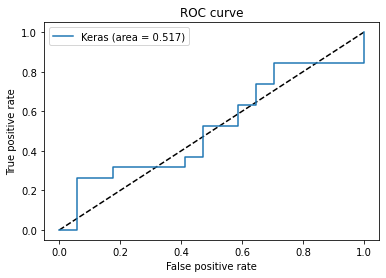

In [106]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

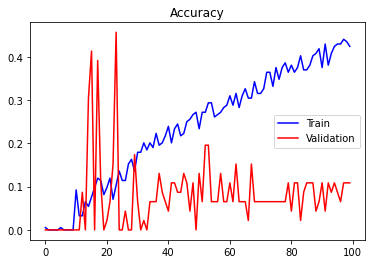

In [107]:
plt.figure()
plt.plot(range(len(history2.history['accuracy'])), history2.history['accuracy'], 'b', label='Train')
plt.plot(range(len(history2.history['val_accuracy'])), history2.history['val_accuracy'], 'r', label='Validation')
plt.legend()

plt.title('Accuracy')
plt.show()

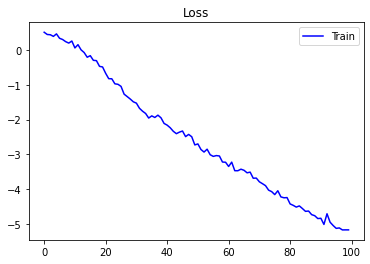

In [108]:
plt.figure()
plt.plot(range(len(history2.history['loss'])), history2.history['loss'], 'b', label='Train')
plt.legend()

plt.title('Loss')
plt.show()